# Dynamic Programming

* 어려운 문제를 여러개의 하위 문제로 쪼개고, 이 하위 문제들을 먼저 해결하는 방법이 동적 프로그래밍이다.(하위문제들의 답을 저장해놓기 때문에 공간을 더 많이 사용하지만 빠른 실행속도의 장점을 가지고 있다)
* 탐욕알고리즘과는 다르게 최적해를 구할수있으며 모든 가능성을 살펴보는 O(2**n)에 비해서 빠르다.

## 분할정복 VS 동적 프로그래밍
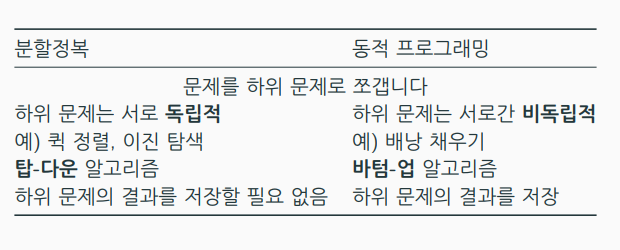

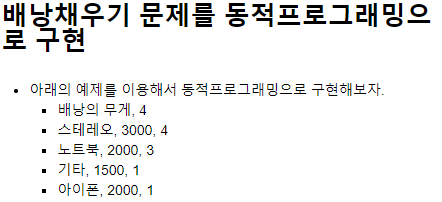

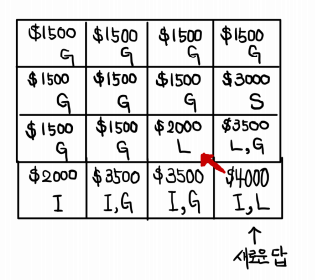

In [1]:
W = 4
wt = [4, 3, 1, 1]
val = [3000, 2000, 1500, 2000]
n =len(val)

def knapsack(W, wt, val, n):
    
    K = [[0 for x in range(W+1)] for y in range(n+1)]
    
    for i in range(n+1):
        for j in range(W+1):
            if i == 0 or j == 1: #초기조건
                K[i][j] = 0
            elif wt[i-1] <= j:
                K[i][j] = max(K[i-1][j], val[i-1] + K[i-1][j-wt[i-1]])
            else:
                K[i][j] = K[i-1][j]
    return K[n][W]

knapsack(W, wt, val, n)

4000

In [2]:
#아이폰이 없다면
W = 4
wt = [4,3,1]
val = [3000,2000,1500]
n = len(val)
knapsack(W, wt, val, n)

3500

## 최장 공통 부분 문자열(LCS : Longest Common Substring)

* 동적 프로그래밍을 사용한 답을 즉각 떠올리는 것은 어려운 일이다, 항상 단계적으로 접근해야하며,다음을 고려해야 한다.
    * 모든 동적 프로그래밍의 답안에는 격자가 있다
    * 격자의 각 칸에는 최적화하고자 하는 값을 적는다. 배낭문제의 경우에는 모든 물건의 총가치
    * 각 칸은 원래 문제에 대한 하위 문제이다.

In [5]:
word1 = 'fish'
word2 = 'hish'
def lcs(word1, word2):
    m = len(word1)
    n = len(word2)
    grid = [[0 for x in range(n+1)] for y in range(m+1)]
    for i in range(m+1):
        for j in range(n+1):
            if i == 0 or j== 0:
                grid[i][j] = 0
            elif word1[i-1] == word2[j-1]:
                grid[i][j] = grid[i-1][j-1] + 1
            else:
                grid[i][j] = 0
    max_value = []
    for item in grid:
        max_value.append(max(item))
    return max(max_value)

print(lcs(word1,word2))
word1 = 'vista'
print(lcs(word1,word2))

3
2


### 최장 공통 부분열

* 만약 실수로 fosh라는 단어를 입력했다면 이사람은 fish를 입력한것일까 fort를 입력한것일까?
* lcs를 적용하면 둘다 똑같이 2의 결과를 주지만 실제로 fish가 더 fosh에 근접한다.
* 즉, 이런 경우 최장 공통 부분 문자열의 길이가 아니라 두 단어에서 순서가 바뀌지 않고 공통으로 들어간 글자의 개수를 구하는 것이 옳다.

In [8]:
word1 = 'fish'
word2 = 'fosh'
word3 = 'fort'
def lcs(word1, word2):
    m = len(word1)
    n = len(word2)
    grid = [[0 for x in range(n+1)] for y in range(m+1)]
    
    for i in range(m+1):
        for j in range(n+1):
            if i == 0 or j == 0:
                grid[i][j] = 0
            if word1[i-1] == word2[j-1]:
                grid[i][j] = grid[i-1][j-1] + 1
            else:
                grid[i][j] = max(grid[i-1][j], grid[i][j-1])
                
    return grid[m][n]

print(lcs(word1,word2))
print(lcs(word2,word3))

4
2


## 정리

* 동적 프로그래밍은 제한 조건이 있는 경우에 무언가를 최적화할 때 유용하다.
* 동적 프로그래밍은 큰 문제를 작은 하위 문제로 나누어 푸는 방법이다.
* 격자를 사용한다
* 동적 프로그래밍의 해답을 계산해 주는 쉬운 공식 같은 것은 없다.